# 1210
* 데이터 전처리 통일
* 코드 정리
* 상세 파라미터 조정
* 데이터, 모델 저장
* 모델 정확도 비교, 분류 비교


## 0. 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 46.9 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
def sent_to_morphs(sent, stopwords, norm):
  tokenized = okt.morphs(sent, stem=True)
  sw_removed = [word for word in tokenized if not word in stopwords]
  normalized = []
  for word in sw_removed:
    changed = False
    for n in norm: ## 두번 이상 나온 이모티콘 정규화
      if n in word:
        normalized.append(n)
        changed = True
    if 'ㅜ' in word: ## ㅜ를 ㅠ로 변환
      normalized.append('ㅠ')
      changed = True
    
    if not changed:
      normalized.append(word)
  return normalized

In [ ]:
def sent_to_letters(sent):
  lst = []
  for let in sent:
    lst.append(let)
  return lst

In [ ]:
import re

HangeulStart = 44032
Chosung = 588
Joongsung = 28

ChosungList = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
JoongsungList = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ','ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
JongsungList = ['', 'ㄱ', 'ㄲ', 'ㄱㅅ', 'ㄴ', 'ㄴㅈ', 'ㄴㅎ', 'ㄷ', 'ㄹ', 'ㄹㄱ', 'ㄹㅁ', 'ㄹㅂ', 'ㄹㅅ', 'ㄹㅌ', 'ㄹㅍ', 'ㄹㅎ', 'ㅁ', 'ㅂ', 'ㅂㅅ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

def letter_to_char(word):
  
  if re.match('.*[ㄱ-ㅎ ㅏ-ㅣ 가-힣]+.*', word) is not None:
    result = []
    
    char_code = ord(word) - HangeulStart
    char1 = int(char_code / Chosung)
    result.append(ChosungList[char1])

    char2 = int((char_code - (Chosung * char1)) / Joongsung)
    result.append(JoongsungList[char2])

    char3 = int((char_code - (Chosung * char1) - (Joongsung * char2)))
    result.append(JongsungList[char3])
  else:
    result = [word]

  return result

def sent_to_chars(sent):
  result = []
  for let in sent:
    if let == ' ':
      result.append(' ')
    else:
      char = letter_to_char(let)
      for c in char:
        result.append(c)
  return result

In [ ]:
data_org = pd.read_excel("/gdrive/My Drive/Colab Notebooks/한국어_단발성_대화_데이터셋.xlsx")[['Sentence', 'Emotion']]
data = data_org.drop_duplicates(subset=['Sentence'])

In [ ]:
X_morphs = []
X_letters = []
y_chars = []
y_morphs = []
y_letters = []
y_chars = []
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '다', '이다', '로', '요', '고', '을', '.', ',']
stopwords = []
norm = ['!', '?', 'ㅠ', 'ㅋ', 'ㅎ', '.', '~', ',', ';', '^', 'ㄷ', 'ㅡ', 'ㅉ']
for i in range(len(data)):

  try:
    sent = data['Sentence'][i]
    m = sent_to_morphs(sent, stopwords, norm)
    X_morphs.append(m)
    y_morphs.append(data['Emotion'][i])
  except:
    pass
  
  try:
    sent = data['Sentence'][i]
    l = sent_to_letters(sent)
    X_letters.append(l)
    y_letters.append(data['Emotion'][i])
  except:
    pass

  try:
    sent = data['Sentence'][i]
    c = sent_to_chars(sent)
    X_chars.append(c)
    y_chars.append(data['Emotion'][i])
  except:
    pass

In [ ]:
np.save("/gdrive/My Drive/Colab Notebooks/final_X_morphs", X_morphs)
np.save("/gdrive/My Drive/Colab Notebooks/final_X_letters", X_letters)
np.save("/gdrive/My Drive/Colab Notebooks/final_X_chars", X_chars)
np.save("/gdrive/My Drive/Colab Notebooks/final_y_morphs", y_morphs)
np.save("/gdrive/My Drive/Colab Notebooks/final_y_letters", y_letters)
np.save("/gdrive/My Drive/Colab Notebooks/final_y_chars", y_chars)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
X_morphs = np.load("/gdrive/My Drive/Colab Notebooks/final_X_morphs.npy", allow_pickle=True)
X_letters = np.load("/gdrive/My Drive/Colab Notebooks/final_X_letters.npy", allow_pickle=True)
X_chars = np.load("/gdrive/My Drive/Colab Notebooks/final_X_chars.npy", allow_pickle=True)
y_morphs = np.load("/gdrive/My Drive/Colab Notebooks/final_y_morphs.npy", allow_pickle=True)

In [ ]:
print(len(X_morphs), len(y_morphs))

38424 38424


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y_morphs = enc.fit_transform(y_morphs)
y_letters = enc.transform(y_letters)
y_chars = enc.transform(y_chars)

In [ ]:
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_morphs, y_morphs, test_size=0.3, random_state=777, stratify=y_morphs)

In [ ]:
from sklearn.model_selection import train_test_split
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_letters, y_letters, test_size=0.3, random_state=777, stratify=y_letters)

## 1. 형태소분석 + BoW/Tf-idf + NB/SVM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_m = CountVectorizer(analyzer=lambda x: x, max_features=5811)
Xm_train_bow = vectorizer_m.fit_transform(Xm_train)
Xm_test_bow = vectorizer_m.transform(Xm_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_m = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
Xm_train_tf = tfidf_m.fit_transform(Xm_train_bow)
Xm_test_tf = tfidf_m.transform(Xm_test_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nbc_m_bow = MultinomialNB()
nbc_m_bow.fit(Xm_train_bow, ym_train)

nbc_m_tf = MultinomialNB()
nbc_m_tf.fit(Xm_train_tf, ym_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ym_test, nbc_m_bow.predict(Xm_test_bow)))
print(accuracy_score(ym_test, nbc_m_tf.predict(Xm_test_tf)))

0.4847328244274809
0.4815232477446218


In [ ]:
from sklearn.svm import SVC

svc_m_bow = SVC()
svc_m_bow.fit(Xm_train_bow, ym_train)

svc_m_tf = SVC()
svc_m_tf.fit(Xm_train_tf, ym_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ym_test, svc_m_bow.predict(Xm_test_bow)))
print(accuracy_score(ym_test, svc_m_tf.predict(Xm_test_tf)))

0.47432338653712697
0.49679042331714085


In [ ]:
import pickle
pickle.dump(nbc_m_bow, open("/gdrive/My Drive/Colab Notebooks/nbc_m.sav", 'wb'))
pickle.dump(svc_m_tf, open("/gdrive/My Drive/Colab Notebooks/svc_m.sav", 'wb'))

## 2. 음절분석 + BoW/Tf-idf + NB/SVM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_l = CountVectorizer(analyzer=lambda x: x)
Xl_train_bow = vectorizer_l.fit_transform(Xl_train)
Xl_test_bow = vectorizer_l.transform(Xl_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_l = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
Xl_train_tf = tfidf_l.fit_transform(Xl_train_bow)
Xl_test_tf = tfidf_l.transform(Xl_test_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nbc_l_bow = MultinomialNB()
nbc_l_bow.fit(Xl_train_bow, yl_train)

nbc_l_tf = MultinomialNB()
nbc_l_tf.fit(Xl_train_tf, yl_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(yl_test, nbc_l_bow.predict(Xl_test_bow)))
print(accuracy_score(yl_test, nbc_l_tf.predict(Xl_test_tf)))

0.4546321998612075
0.4553261623872311


In [ ]:
from sklearn.svm import SVC

svc_l_bow = SVC()
svc_l_bow.fit(Xl_train_bow, yl_train)

svc_l_tf = SVC()
svc_l_tf.fit(Xl_train_tf, yl_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(yl_test, svc_l_bow.predict(Xl_test_bow)))
print(accuracy_score(yl_test, svc_l_tf.predict(Xl_test_tf)))

0.45697432338653715
0.4815232477446218


In [ ]:
import pickle
pickle.dump(nbc_l_tf, open("/gdrive/My Drive/Colab Notebooks/nbc_l.sav", 'wb'))
pickle.dump(svc_l_tf, open("/gdrive/My Drive/Colab Notebooks/svc_l.sav", 'wb'))

## 3. 형태소분석 + Embedding() + LSTM

In [ ]:
from tensorflow.keras.utils import to_categorical

ym_train = to_categorical(ym_train)
ym_test = to_categorical(ym_test)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_m = Tokenizer()
tokenizer_m.fit_on_texts(Xm_train)
Xm_train = tokenizer_m.texts_to_sequences(Xm_train)
Xm_test = tokenizer_m.texts_to_sequences(Xm_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 30
Xm_train = pad_sequences(Xm_train, maxlen=max_len)
Xm_test = pad_sequences(Xm_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
hidden_units = 128
num_classes = 7

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)
mc = ModelCheckpoint('/gdrive/My Drive/Colab Notebooks/emb_lstm_m.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(Xm_train, ym_train, epochs=20, callbacks=[es, mc], batch_size=128, validation_split=0.15)

Epoch 1/20
179/179 [==============================] - ETA: 0s - loss: 1.6301 - acc: 0.3631
Epoch 00001: val_acc improved from -inf to 0.46146, saving model to /gdrive/My Drive/Colab Notebooks/emb_lstm_m.h5
179/179 [==============================] - 27s 137ms/step - loss: 1.6301 - acc: 0.3631 - val_loss: 1.4205 - val_acc: 0.4615
Epoch 2/20
179/179 [==============================] - ETA: 0s - loss: 1.2009 - acc: 0.5379
Epoch 00002: val_acc improved from 0.46146 to 0.46815, saving model to /gdrive/My Drive/Colab Notebooks/emb_lstm_m.h5
179/179 [==============================] - 24s 135ms/step - loss: 1.2009 - acc: 0.5379 - val_loss: 1.3730 - val_acc: 0.4682
Epoch 3/20
179/179 [==============================] - ETA: 0s - loss: 0.9229 - acc: 0.6593
Epoch 00003: val_acc did not improve from 0.46815
179/179 [==============================] - 23s 131ms/step - loss: 0.9229 - acc: 0.6593 - val_loss: 1.4936 - val_acc: 0.4585
Epoch 4/20
179/179 [==============================] - ETA: 0s - loss: 0.

In [ ]:
print(model.evaluate(Xm_test, ym_test))

361/361 [==============================] - 4s 12ms/step - loss: 1.3535 - acc: 0.4784
[1.3534917831420898, 0.47840040922164917]


### Word2Vec/Fasttest 비교 (추가할예정)

In [ ]:
from gensim.models import FastText
from gensim.models import Word2Vec

ft = FastText(sentences=Xm_train, vector_size=100, window=2, min_count=5, sg=1)
w2v = Word2Vec(sentences=Xm_train, vector_size=100, window=2, min_count=5, sg=1)

TypeError: ignored

## 4. 음절분석 + LSTM

In [ ]:
from tensorflow.keras.utils import to_categorical

yl_train = to_categorical(yl_train)
yl_test = to_categorical(yl_test)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_l = Tokenizer()
tokenizer_l.fit_on_texts(Xl_train)
Xl_train = tokenizer_l.texts_to_sequences(Xl_train)
Xl_test = tokenizer_l.texts_to_sequences(Xl_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100
Xl_train = pad_sequences(Xl_train, maxlen=max_len)
Xl_test = pad_sequences(Xl_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
hidden_units = 128
num_classes = 7

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)
mc = ModelCheckpoint('/gdrive/My Drive/Colab Notebooks/emb_lstm_l.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(Xl_train, yl_train, epochs=20, callbacks=[es, mc], batch_size=128, validation_split=0.15)

Epoch 1/20
179/179 [==============================] - ETA: 0s - loss: 1.6292 - acc: 0.3632
Epoch 00001: val_acc improved from -inf to 0.43817, saving model to /gdrive/My Drive/Colab Notebooks/emb_lstm_l.h5
179/179 [==============================] - 68s 370ms/step - loss: 1.6292 - acc: 0.3632 - val_loss: 1.4648 - val_acc: 0.4382
Epoch 2/20
179/179 [==============================] - ETA: 0s - loss: 1.3838 - acc: 0.4693
Epoch 00002: val_acc improved from 0.43817 to 0.46667, saving model to /gdrive/My Drive/Colab Notebooks/emb_lstm_l.h5
179/179 [==============================] - 65s 366ms/step - loss: 1.3838 - acc: 0.4693 - val_loss: 1.3953 - val_acc: 0.4667
Epoch 3/20
179/179 [==============================] - ETA: 0s - loss: 1.3206 - acc: 0.4956
Epoch 00003: val_acc improved from 0.46667 to 0.47063, saving model to /gdrive/My Drive/Colab Notebooks/emb_lstm_l.h5
179/179 [==============================] - 66s 368ms/step - loss: 1.3206 - acc: 0.4956 - val_loss: 1.3837 - val_acc: 0.4706
Epoc

In [ ]:
print(model.evaluate(Xl_test, yl_test))

361/361 [==============================] - 11s 32ms/step - loss: 1.3771 - acc: 0.4740
[1.3770726919174194, 0.47397640347480774]


## 5. Multi-channel CNN (형태소, 음절)

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [ ]:
inputs1 = Input(shape=(30,))
embedding1 = Embedding(21000, 100)(inputs1)
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

inputs2 = Input(shape=(100,))
embedding2 = Embedding(vocab_size, 100)(inputs2)
conv2 = Conv1D(filters=32, kernel_size=10, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

merged = concatenate([flat1, flat2])

dense1 = Dense(200, activation='relu')(merged)
dense2 = Dense(20, activation='relu')(dense1)
outputs = Dense(7, activation='softmax')(dense2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [ ]:
es = EarlyStopping(patience=4, restore_best_weights=True)
mc = ModelCheckpoint('/gdrive/My Drive/Colab Notebooks/multi_cnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit([Xm_train, Xl_train], yl_train, epochs=20, callbacks=[es, mc], batch_size=128, validation_split=0.15)

Epoch 1/20
179/179 [==============================] - ETA: 0s - loss: 1.7908 - acc: 0.2552
Epoch 00001: val_acc improved from -inf to 0.40347, saving model to /gdrive/My Drive/Colab Notebooks/multi_cnn.h5
179/179 [==============================] - 25s 130ms/step - loss: 1.7908 - acc: 0.2552 - val_loss: 1.5321 - val_acc: 0.4035
Epoch 2/20
179/179 [==============================] - ETA: 0s - loss: 1.3330 - acc: 0.4757
Epoch 00002: val_acc improved from 0.40347 to 0.46022, saving model to /gdrive/My Drive/Colab Notebooks/multi_cnn.h5
179/179 [==============================] - 23s 129ms/step - loss: 1.3330 - acc: 0.4757 - val_loss: 1.3879 - val_acc: 0.4602
Epoch 3/20
179/179 [==============================] - ETA: 0s - loss: 1.0530 - acc: 0.5956
Epoch 00003: val_acc improved from 0.46022 to 0.46964, saving model to /gdrive/My Drive/Colab Notebooks/multi_cnn.h5
179/179 [==============================] - 23s 129ms/step - loss: 1.0530 - acc: 0.5956 - val_loss: 1.4086 - val_acc: 0.4696
Epoch 4

In [ ]:
print(model.evaluate([Xm_test, Xl_test], yl_test))

361/361 [==============================] - 3s 8ms/step - loss: 1.3751 - acc: 0.4600
[1.375142216682434, 0.4600104093551636]


## 6. 모델 비교
* 행복, 슬픔, 공포, 혐오, 분노, 놀람, 중립

In [ ]:
# 기본 표현
sent_list = ['정말 행복해',
             '정말 슬퍼',
             '정말 무서워',
             '정말 싫어',
             '정말 화가 나',
             '깜짝 놀랐어',
             '종이는 하얗다']

# 복잡한 표현
sent_list2 = ['ㅋㅋㅋ 유재석 김태호 조합은 믿고 보는거지~',
              '그저께 어머니가 돌아가시고 세상을 잃은 기분입니다..',
              '아이가 어제부터 토를 계속 하는데 어떻게 해야하죠??',
              '이놈이나 저놈이나 다 똑같은 놈들이야',
              '범죄자들 얼굴을 왜 가리나? 신상공개하라!!',
              '이런거보면 참 우주는 대단한 듯.. 37억이라는 세월.. 짐작도 안간다.',
              '저는 법학도이고 현재는 로스쿨에 재학중입니다.']

# 비문과 이모티콘
sent_list3 = ['넘넘 추카해요~~~^^',
              '하.... 나 시험 개망햇다...ㅠ..',
              '나 이번달에 생리를 안하는데?? 어떡하징 ㄷㄷ',
              '표절가수 얼굴 보기도 실타ㅋㅋ 나오지 마라',
              '아 징짜 ㅡㅡ 초딩은 사람도 아님?',
              '헐 마라탕 위생 문졔 있다구?? 나 마라탕 어제도 먹엇는데??',
              '이번네 삼성에서 새로운 핸드폰이 출시됩비다.']

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pickle
from tensorflow.keras.models import load_model

loaded_model1 = pickle.load(open("/gdrive/My Drive/Colab Notebooks/svc_m.sav", 'rb'))
loaded_model2 = pickle.load(open('/gdrive/My Drive/Colab Notebooks/svc_l.sav', 'rb'))
loaded_model3 = load_model('/gdrive/My Drive/Colab Notebooks/emb_lstm_m.h5')
loaded_model4 = load_model('/gdrive/My Drive/Colab Notebooks/emb_lstm_l.h5')
loaded_model5 = load_model('/gdrive/My Drive/Colab Notebooks/multi_cnn.h5')

In [ ]:
models = [loaded_model1, loaded_model2, loaded_model3, loaded_model4, loaded_model5]
sentence = sent_list + sent_list2 + sent_list3

In [ ]:
stopwords = []
norm = ['!', '?', 'ㅠ', 'ㅋ', 'ㅎ', '.', '~', ',', ';', '^', 'ㄷ', 'ㅡ', 'ㅉ']

sent_m = []
sent_l = []

for sent in sentence:
  m = sent_to_morphs(sent, stopwords, norm)
  l = sent_to_letters(sent)

  sent_m.append(m)
  sent_l.append(l)

sent_m_vec = vectorizer_m.transform(sent_m)
sent_m_tf = tfidf_m.transform(sent_m_vec)

sent_l_vec = vectorizer_l.transform(sent_l)
sent_l_tf = tfidf_l.transform(sent_l_vec)

sent_m_tok = tokenizer_m.texts_to_sequences(sent_m)
sent_m_pad = pad_sequences(sent_m_tok, maxlen=30)

sent_l_tok = tokenizer_l.texts_to_sequences(sent_l)
sent_l_pad = pad_sequences(sent_l_tok, maxlen=100)

In [ ]:
pred = []

pred.append(models[0].predict(sent_m_tf))
pred.append(models[1].predict(sent_l_tf))

pred2 = models[2].predict(sent_m_pad)
pred3 = models[3].predict(sent_l_pad)
pred4 = models[4].predict([sent_m_pad, sent_l_pad])

pred.append(np.argmax(pred2,axis=1))
pred.append(np.argmax(pred3,axis=1))
pred.append(np.argmax(pred4,axis=1))

result = []

result.append(enc.inverse_transform(pred[0]))
result.append(enc.inverse_transform(pred[1]))
result.append(enc.inverse_transform(pred[2]))
result.append(enc.inverse_transform(pred[3]))
result.append(enc.inverse_transform(pred[4]))

In [ ]:
for i in range(len(sentence)):
  print(sentence[i])
  print('\t\t\t\t\t\t\t\t', result[0][i], result[1][i], result[2][i], result[3][i], result[4][i])

정말 행복해
								 행복 행복 행복 행복 행복
정말 슬퍼
								 슬픔 슬픔 슬픔 슬픔 슬픔
정말 무서워
								 공포 공포 공포 공포 공포
정말 싫어
								 혐오 혐오 분노 혐오 슬픔
정말 화가 나
								 분노 분노 분노 분노 분노
깜짝 놀랐어
								 놀람 놀람 놀람 놀람 놀람
종이는 하얗다
								 중립 중립 놀람 놀람 행복
ㅋㅋㅋ 유재석 김태호 조합은 믿고 보는거지~
								 행복 행복 행복 행복 행복
그저께 어머니가 돌아가시고 세상을 잃은 기분입니다..
								 슬픔 슬픔 슬픔 슬픔 슬픔
아이가 어제부터 토를 계속 하는데 어떻게 해야하죠??
								 공포 공포 공포 공포 공포
이놈이나 저놈이나 다 똑같은 놈들이야
								 분노 분노 분노 분노 혐오
범죄자들 얼굴을 왜 가리나? 신상공개하라!!
								 분노 분노 분노 분노 분노
이런거보면 참 우주는 대단한 듯.. 37억이라는 세월.. 짐작도 안간다.
								 놀람 놀람 놀람 중립 놀람
저는 법학도이고 현재는 로스쿨에 재학중입니다.
								 중립 중립 중립 행복 중립
넘넘 추카해요~~~^^
								 행복 행복 행복 행복 행복
하.... 나 시험 개망햇다...ㅠ..
								 슬픔 슬픔 슬픔 공포 슬픔
나 이번달에 생리를 안하는데?? 어떡하징 ㄷㄷ
								 공포 놀람 공포 공포 공포
표절가수 얼굴 보기도 실타ㅋㅋ 나오지 마라
								 행복 혐오 혐오 중립 중립
아 징짜 ㅡㅡ 초딩은 사람도 아님?
								 분노 분노 분노 놀람 혐오
헐 마라탕 위생 문졔 있다구?? 나 마라탕 어제도 먹엇는데??
								 놀람 놀람 놀람 놀람 놀람
이번네 삼성에서 새로운 핸드폰이 출시됩비다.
								 중립 중립 중립 중립 중립


## 7. 결과 비교

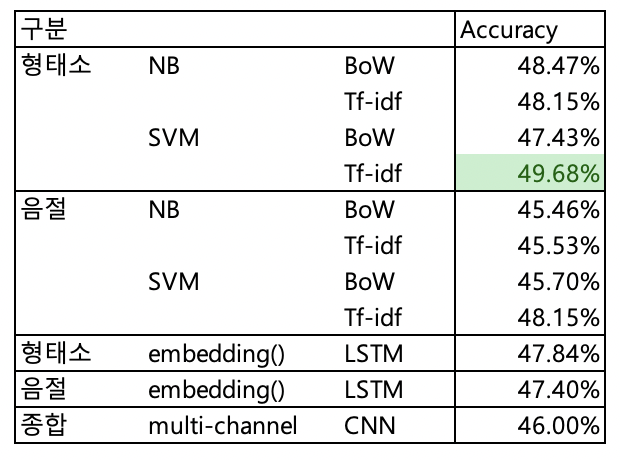

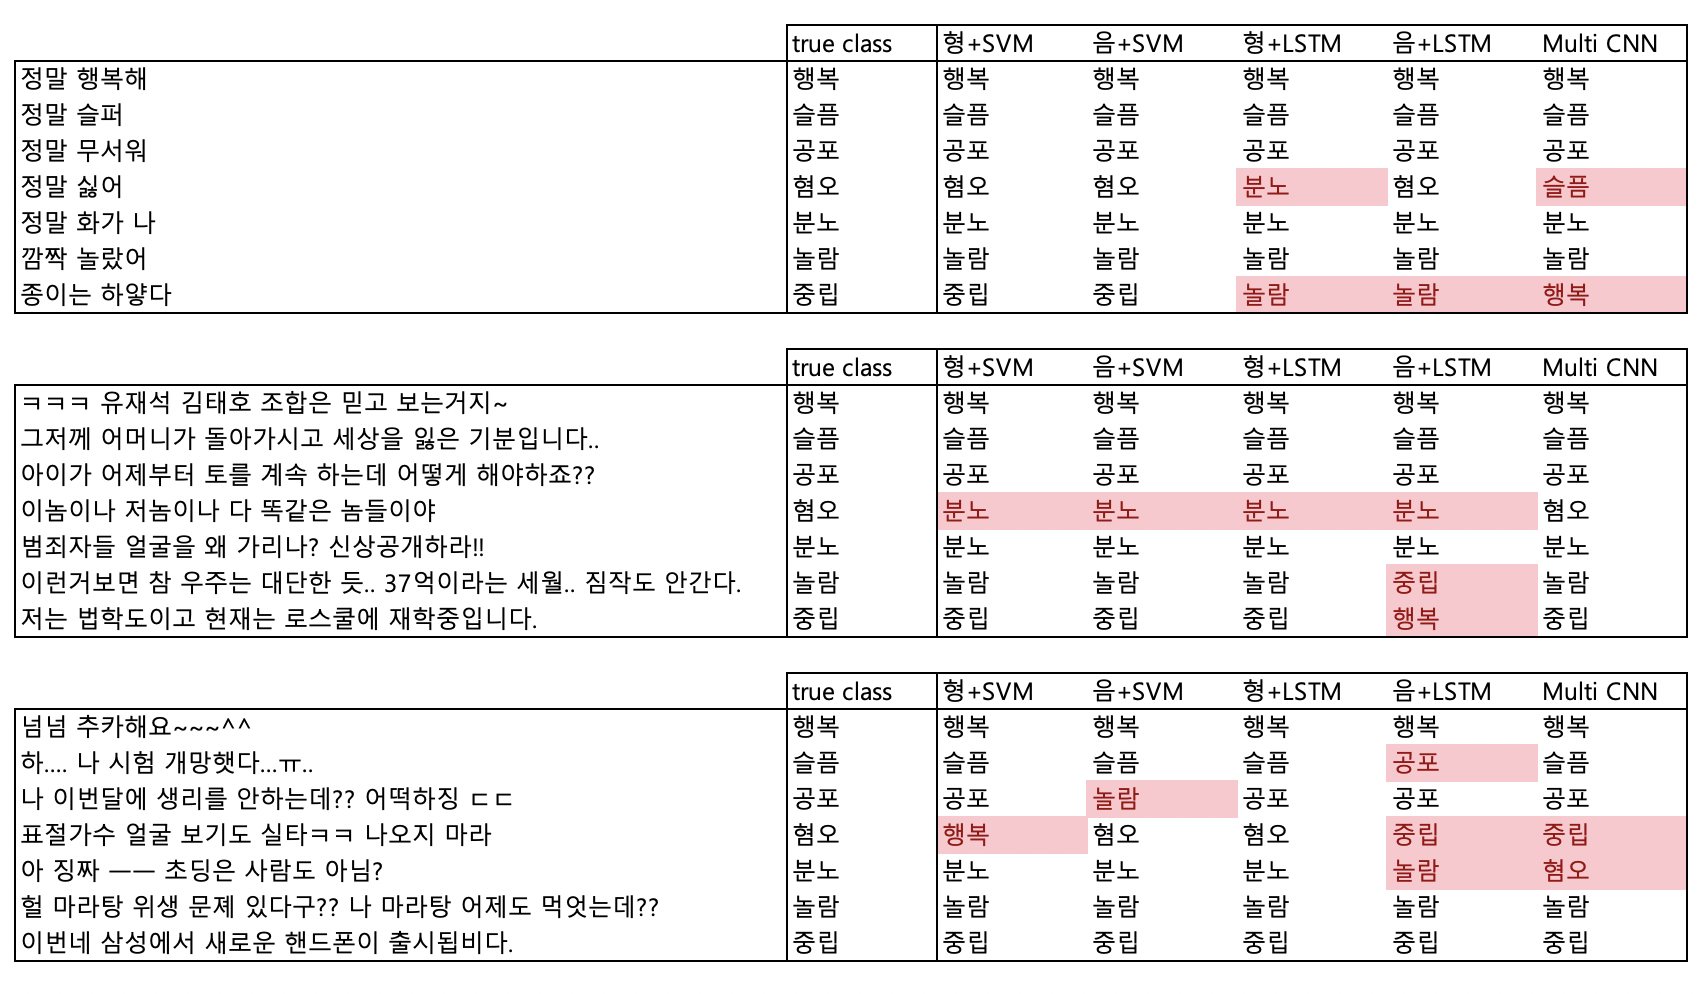

* 전체적으로 단어와 음절을 count해서 분류하는 방식이 성능이 좋았음. -> 문장의 길이가 짧고 한국어는 앞 뒤를 바꾸어도 말이 되기 때문이라고 생각. 
* 혐오와 분노가 분류가 잘 안되었음. 
* 형태소로 나누는 것과 음절로 나누는 것이 모두 성능이 좋았음. 